In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

# 1. Clustering with K-Means


In [2]:
!curl -o Customer.csv https://maktabkhooneh.org/media/courses/projects/1632560262896716.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3981  100  3981    0     0   3215      0  0:00:01  0:00:01 --:--:--  3218


In [3]:
df = pd.read_csv("Customer.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre-processing

In [4]:
# We drop the Gender because K-means is designed for continuous numerical data. 
df.drop('Gender', axis=1, inplace=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


## Visualization

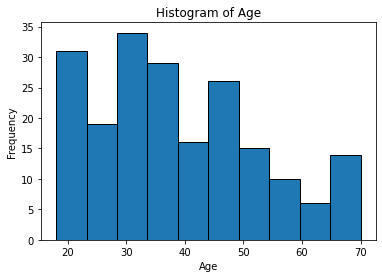

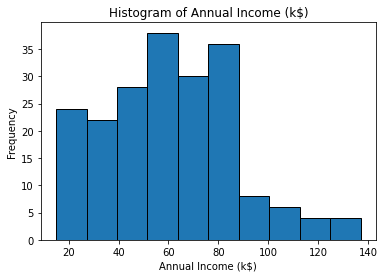

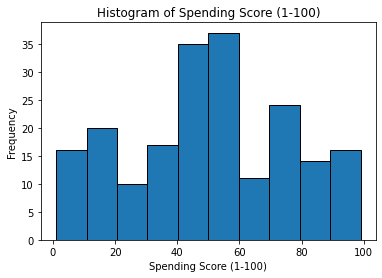

In [5]:
for column in df.columns[1:]:
    plt.figure()
    df[column].plot(kind = 'hist', edgecolor='black', bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### From above histograms we see no outliers

## Normalization

In [6]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
# print(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

## Modelling

##  finding the optimal value of k with Elbow method

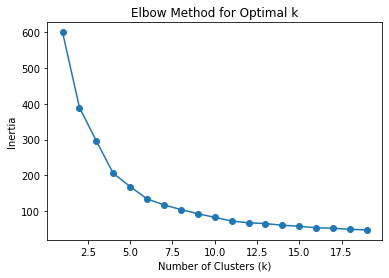

In [7]:
inertia = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init = 12)
    kmeans = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    kmeans.fit(Clus_dataSet)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 20), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### we choose k=5 as the elbow point

In [8]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[3 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 4 3 1 3 1 3 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 4 3 4 4 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 4 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
 3 2 3 3 3 4 4 4 4 3 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [9]:
# adding a column for Labels
df["Clus_km"] = labels
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,19,15,39,3
1,2,21,15,81,3
2,3,20,16,6,1
3,4,23,16,77,3
4,5,31,17,40,3


### The distribution of customers based on their age and income:


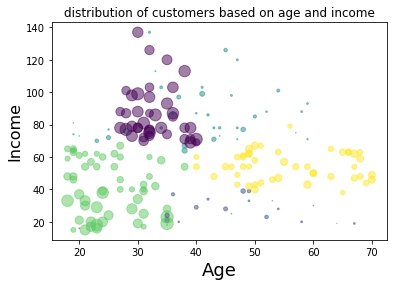

In [10]:
area = 0.005*np.pi*( X[:, 2])**2  # defining the area in terms of Spending Score

plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.title('distribution of customers based on age and income')
plt.show()


### The distribution of customers based on their age and spending score:

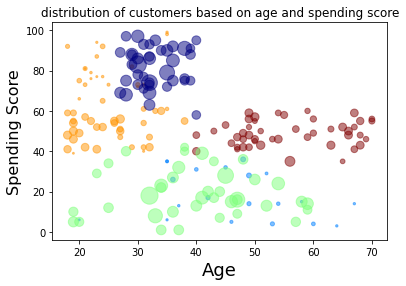

In [11]:
area = 0.005*np.pi*( X[:, 1])**2  # defining the area in terms of income

# Converting labels to float
c = labels.astype(np.float)

# Defining a color map
cmap = plt.get_cmap('jet')

scatter = plt.scatter(X[:, 0], X[:, 2], s=area, c=c, cmap=cmap, alpha=0.5)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.title('distribution of customers based on age and spending score')
plt.show()

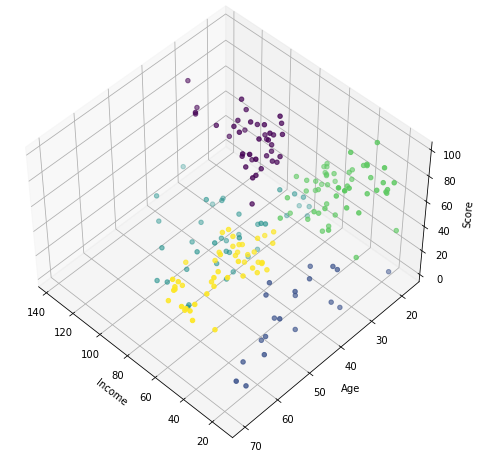

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Score')

ax.scatter(X[:, 1], X[:, 0], X[:, 2], c= labels.astype(np.float))


# 2. Hierarchical Clustering

In [13]:
from scipy import ndimage 
import pylab
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

In [14]:
df_hc = pd.read_csv("Customer.csv") # df for hierarchical clustering(hc)
df_hc = df_hc.dropna()
df_hc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre-processing

In [15]:
# We drop the Gender because K-means is designed for continuous numerical data. 
df_hc.drop('Gender', axis=1, inplace=True)
df_hc.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [16]:
featureset = df_hc[['Age',  'Annual Income (k$)', 'Spending Score (1-100)']]

## Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values 
min_max_scaler = MinMaxScaler()
xN = min_max_scaler.fit_transform(x) # xn: Normalized X
xN [0:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

## 2-1. Hierarchical Clustering using Scipy

In [18]:
import scipy
Lx = xN.shape[0] # length of x
D = scipy.zeros([Lx,Lx])
for i in range(Lx):
    for j in range(Lx):
        D[i,j] = scipy.spatial.distance.euclidean(xN[i], xN[j])
D

<ipython-input-18-bba8a063a76b>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([Lx,Lx])


array([[0.        , 0.43029381, 0.33738296, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 0.76559158, ..., 0.93683095, 1.20748243,
        1.01507247],
       [0.33738296, 0.76559158, 0.        , ..., 1.16089362, 1.02563246,
        1.27984489],
       ...,
       [1.00888686, 0.93683095, 1.16089362, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.02563246, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.27984489, ..., 0.13432353, 0.66437953,
        0.        ]])

In [19]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-19-8655000d21de>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [20]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 5, 2, 5, 3, 5, 2, 5, 1, 5, 1, 5, 1, 5, 2, 5, 3, 5, 3, 5, 3, 5,
       1, 5, 1, 5, 3, 3, 3, 5, 1, 5, 1, 5, 3, 5, 3, 5, 3, 5, 1, 5, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 5, 2, 5, 2, 5,
       3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 4, 3, 5, 3, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 4, 3, 5, 2, 5, 2, 4, 2, 5,
       2, 5, 2, 4, 3, 4, 2, 4, 3, 4, 2, 5, 2, 4, 3, 5, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

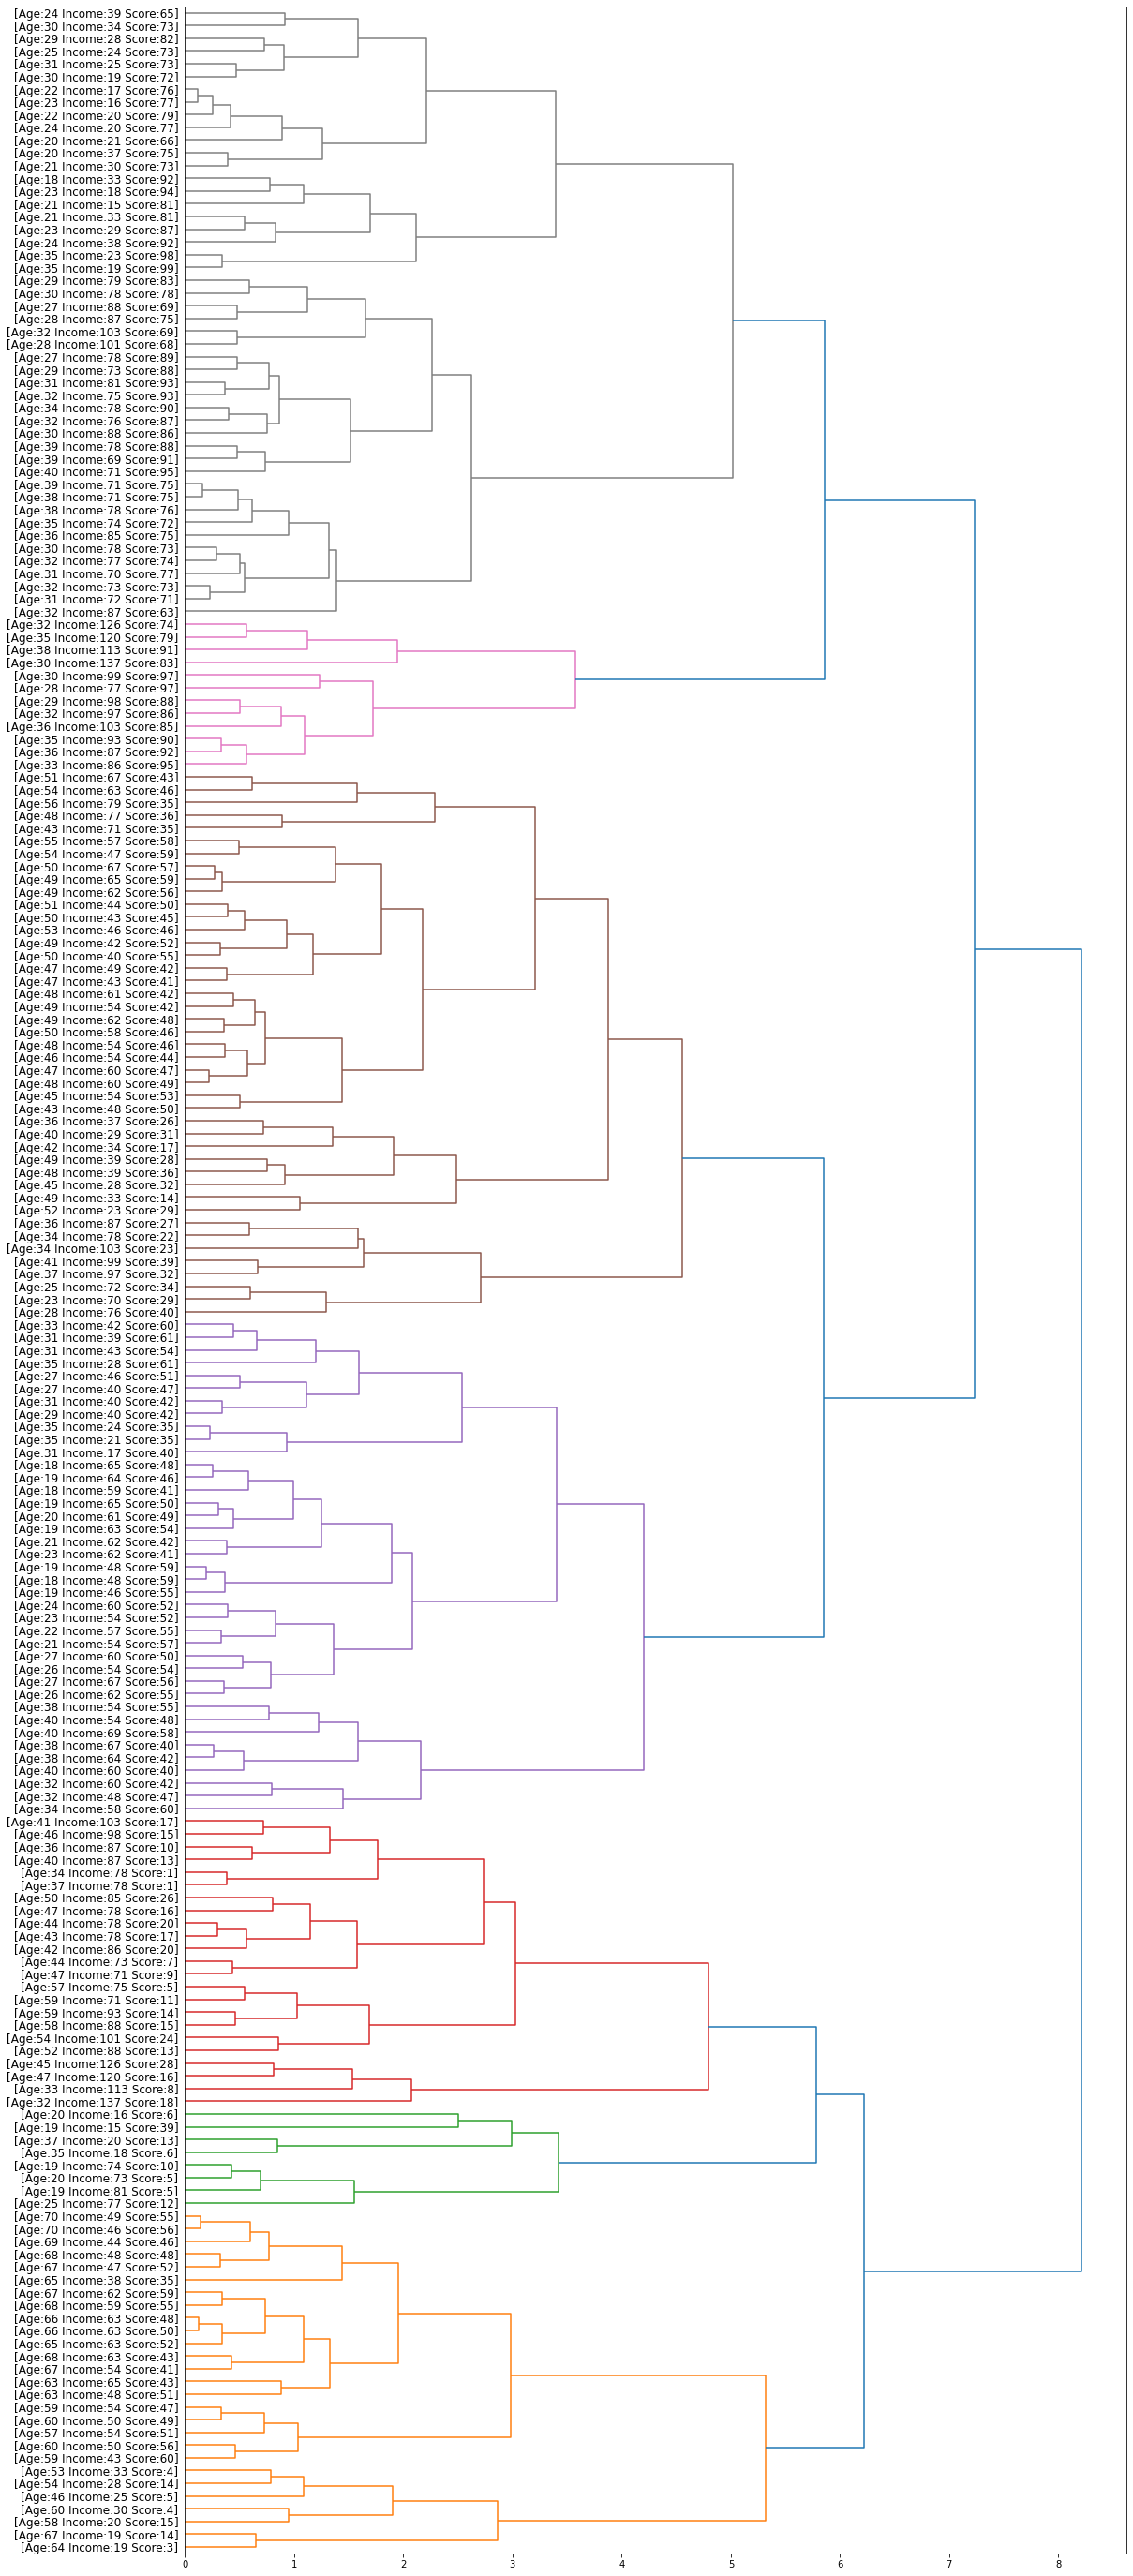

In [21]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[Age:%s Income:%s Score:%s]' % (df_hc['Age'][id], df_hc['Annual Income (k$)'][id], df_hc['Spending Score (1-100)'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## 2-2. Hierarchical Clustering using scikit-learn

In [22]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(xN,xN) 
print(dist_matrix)

[[0.         0.43029381 0.33738296 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         0.76559158 ... 0.93683095 1.20748243 1.01507247]
 [0.33738296 0.76559158 0.         ... 1.16089362 1.02563246 1.27984489]
 ...
 [1.00888686 0.93683095 1.16089362 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.02563246 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.27984489 ... 0.13432353 0.66437953 0.        ]]


In [23]:
Z_skl = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-23-d921aa98367f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_skl = hierarchy.linkage(dist_matrix, 'complete')


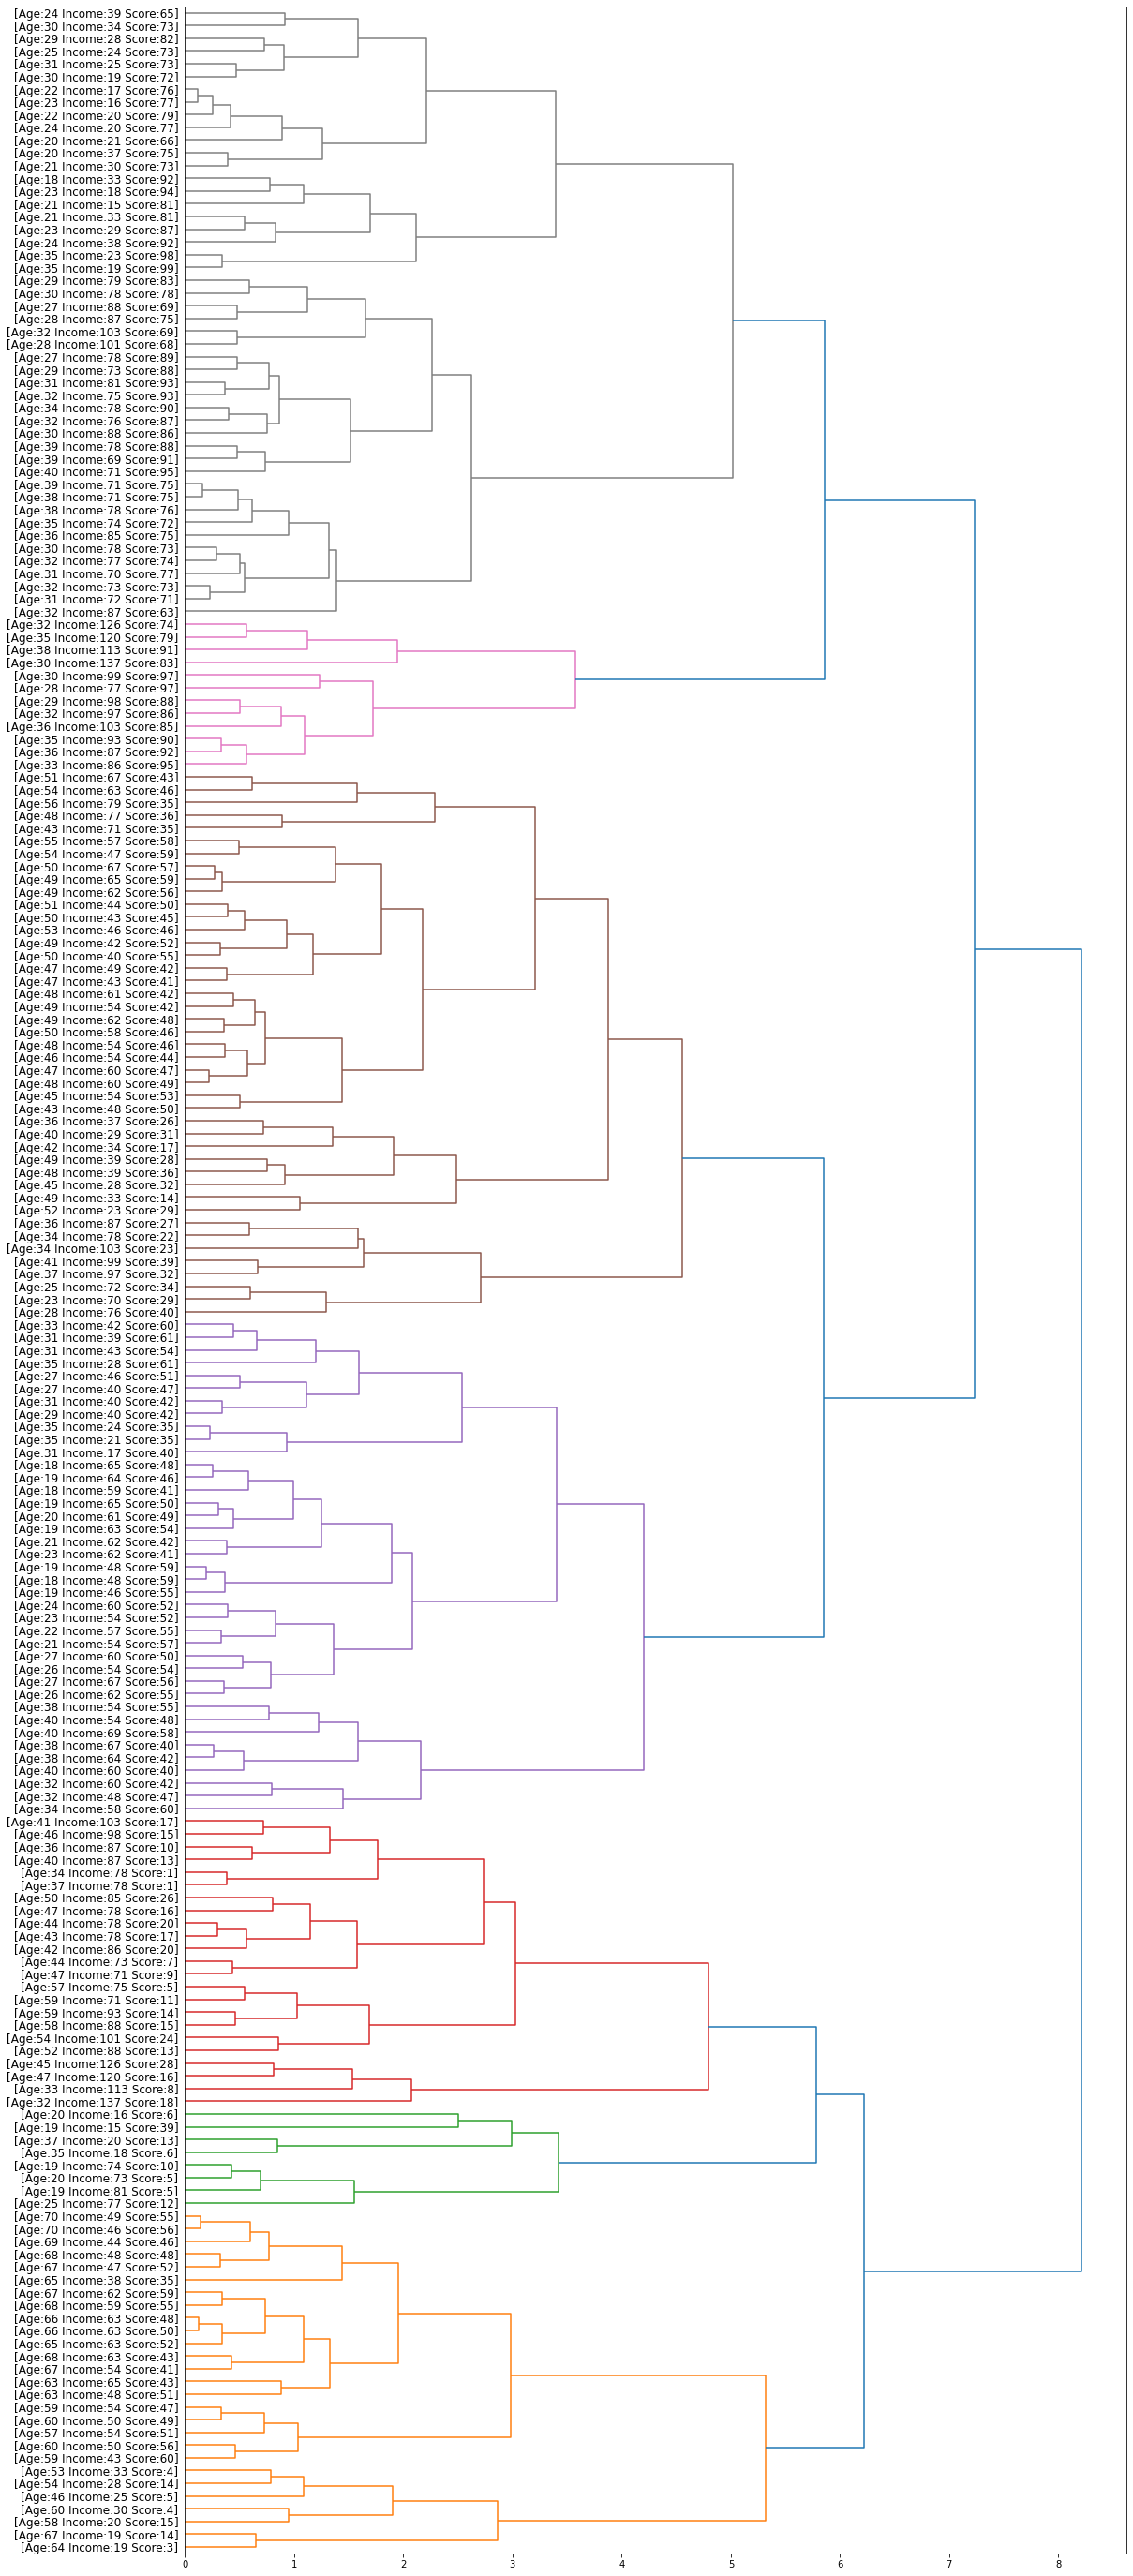

In [24]:
ig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[Age:%s Income:%s Score:%s]' % (df_hc['Age'][id], df_hc['Annual Income (k$)'][id], df_hc['Spending Score (1-100)'][id] )
    
dendro = hierarchy.dendrogram(Z_skl,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [25]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

D:\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 4, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 4, 0, 2, 1, 2, 1, 4, 1, 2,
       1, 2, 1, 4, 0, 4, 1, 4, 0, 4, 1, 2, 1, 4, 0, 2, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [26]:
df_hc['cluster_'] = agglom.labels_
df_hc.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,19,15,39,1
1,2,21,15,81,2
2,3,20,16,6,1
3,4,23,16,77,2
4,5,31,17,40,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'Score')

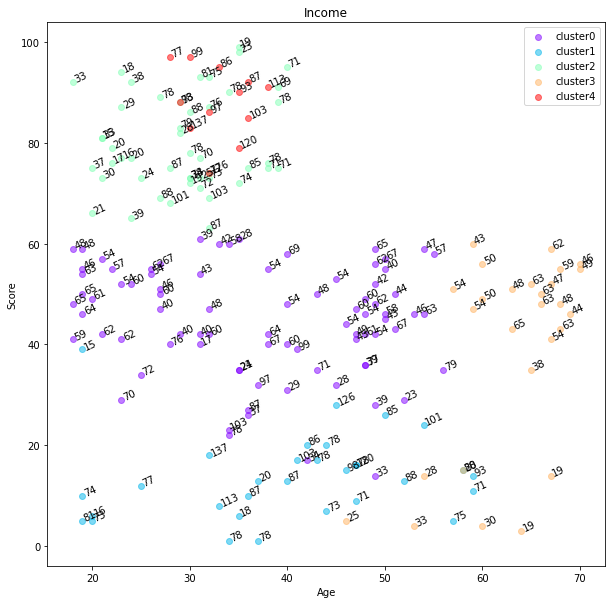

In [27]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df_hc[df_hc.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Spending Score (1-100)'][i], subset['Annual Income (k$)'][i], rotation=25) 
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Income')
plt.xlabel('Age')
plt.ylabel('Score')